# **Regresión por Mínimos Cuadrados Parciales (PLS)**


**Este documento es una introducción clara y sencilla al algoritmo de Regresión por Mínimos Cuadrados Parciales (PLS)**.  
---  
&nbsp;

---
## 📄 Introducción

La regresión por Mínimos Cuadrados Parciales (PLS, por sus siglas en inglés) es una técnica estadística que combina la reducción de dimensionalidad con la regresión. Se utiliza especialmente cuando hay muchas variables independientes que están altamente correlacionadas o cuando hay más variables que observaciones.  
  
&nbsp;

---

## 🔠 ¿Cuándo se usa?

- Cuando existe **multicolinealidad** entre las variables predictoras.
- Cuando el número de variables es **muy alto**.
- En contextos como la química, biología, economía y ciencias de datos:
  * Química (para predecir propiedades de mezclas)

  * Marketing (para predecir comportamiento del consumidor)

   * Bioinformática (con muchos genes y pocas muestras)
     
   * Machine learning cuando hay pocos datos y muchas columnas

&nbsp;


---
## 🔢 Fundamento Matemático Básico

PLS transforma las variables originales \( X \) e \( Y \) en nuevos componentes latentes que explican la mayor parte de su covarianza.

&nbsp;
$$
X = T P^T + E
$$
$$
Y = U Q^T + F
$$

&nbsp;

- \( T \), \( U \): Componentes latentes (scores)
- \( P \), \( Q \): Cargas (loadings)
- \( E \), \( F \): Residuos


PLS busca encontrar componentes que **maximicen la covarianza entre X y Y**.

&nbsp;


---
## 🚀 Parámetros Principales

| Parámetro        | Descripción                                                  |
|------------------|-------------------------------------------------------------|
| `n_components`   | Número de componentes a extraer.                            |
| `scale`          | Si se estandarizan o no las variables.                      |
| `algorithm`      | Método de solución: 'nipals' (por defecto) o 'svd'.          |
| `max_iter`       | Máximo número de iteraciones.                              |
| `tol`            | Tolerancia para convergencia.                               |

&nbsp;

---


Proportion of dangerous cases: 0.50
Most common symptoms:

    symptom_1  symptom_2  symptom_3
0         56         48         43
1         44         52         57

Species most affected by symptoms:

          symptom_1  symptom_2  symptom_3
species                                 
Cat              8          8         11
Cow             10         13         15
Dog             12         12         10
Horse            5         11          9
Sheep            9          8         12

Symptoms in deceased animals:

    symptom_1  symptom_2  symptom_3
1          7          7          7
Regression coefficients for each symptom: [0.18977816 0.30012021 0.4617375 ]
Mean Squared Error: 0.01



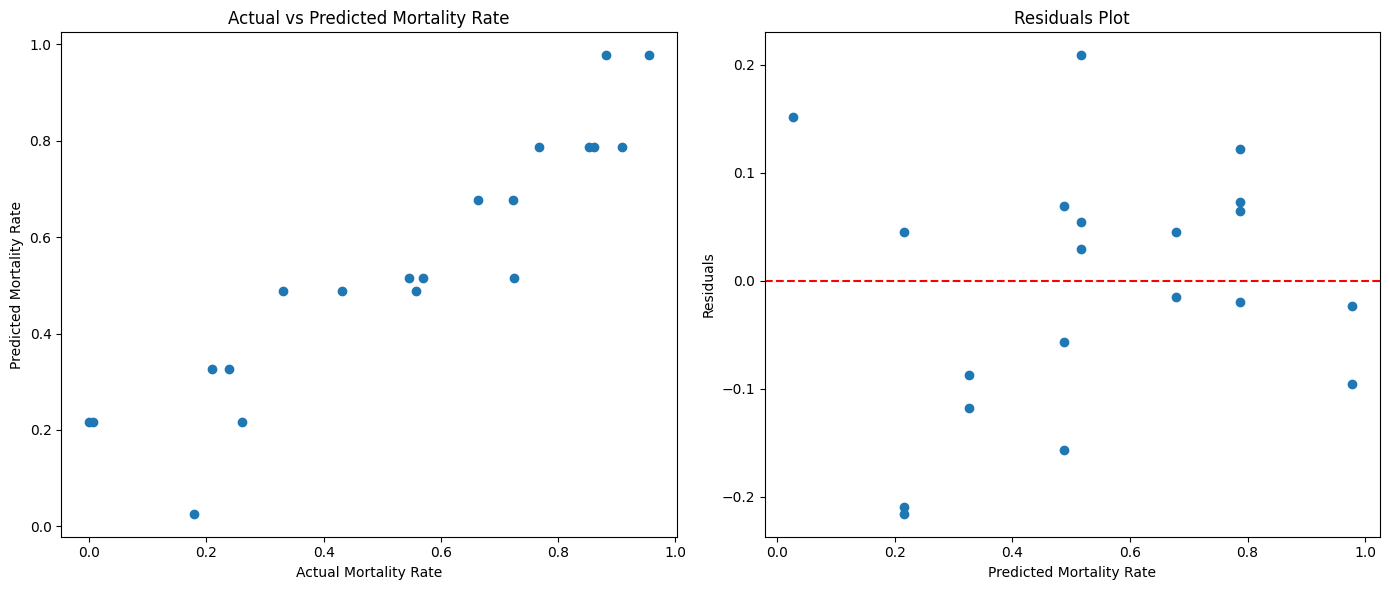

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('animal_symptoms.csv')

# Question 1: What proportion of cases are considered dangerous?
dangerous_cases = data[data['mortality_rate'] > 0.5]
dangerous_proportion = len(dangerous_cases) / len(data)
print(f'Proportion of dangerous cases: {dangerous_proportion:.2f}')

# Question 2: What are the most common symptoms?
symptom_columns = ['symptom_1', 'symptom_2', 'symptom_3']
common_symptoms = data[symptom_columns].apply(pd.Series.value_counts).fillna(0)
print('Most common symptoms:\n\n', common_symptoms)

# Question 3: Which species are most affected by these symptoms?
species_symptoms = data.groupby('species')[symptom_columns].sum()
print('\nSpecies most affected by symptoms:\n\n', species_symptoms)

# Question 4: What symptoms do animals that have died present?
deceased_animals = data[data['mortality_rate'] == 1]  # assuming 1 means deceased
deceased_symptoms = deceased_animals[symptom_columns].apply(pd.Series.value_counts).fillna(0)
print('\nSymptoms in deceased animals:\n\n', deceased_symptoms)

# Question 5: Can we find a pattern of symptoms associated with dangerous cases?
# Let's model this with linear regression to see the relationship
X = data[symptom_columns].values
y = data['mortality_rate'].values

# Train-test split for linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Coefficients of the regression (important for identifying the pattern)
print(f'Regression coefficients for each symptom: {regressor.coef_}')

# Predictions for test set
y_pred = regressor.predict(X_test)

# Mean squared error for evaluation
mse = np.mean((y_pred - y_test) ** 2)
print(f'Mean Squared Error: {mse:.2f}\n')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Actual vs Predicted Mortality Rate
axes[0].scatter(y_test, y_pred)
axes[0].set_xlabel('Actual Mortality Rate')
axes[0].set_ylabel('Predicted Mortality Rate')
axes[0].set_title('Actual vs Predicted Mortality Rate')

# Second plot: Residuals Plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Mortality Rate')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()

&nbsp;
&nbsp;

---
## ✅ Ventajas y ❌ Desventajas

### Ventajas
- Resuelve problemas de multicolinealidad.
- Reduce dimensionalidad.
- Funciona bien cuando hay pocas observaciones y muchas variables.

### Desventajas
- Menor interpretabilidad que modelos tradicionales.
- Elegir el número óptimo de componentes puede requerir validación cruzada.

&nbsp;



---

## 📚 Bibliografía


1. Estadística ITM. (s.f.). *Regresión PLS*. https://estadisticaitm.github.io/pls.html  
2. del Val, D. *Modelos matemáticos PLS*. https://delvaldavid.com/files/tfg_math.pdf  
3. Vega Vilca, R. (2018). *Introducción a PLS*. https://www.uprm.edu/wp-content/uploads/sites/171/2018/12/vegavilca.pdf  
4. SCIELO Venezuela. (2003). *Comparación de regresiones multivariadas*. https://ve.scielo.org/
5. Universidad Nacional de Colombia. (2016). *Análisis de regresión PLS*. https://repositorio.unal.edu.co/handle/unal/57110